In [3]:
import investpy as ipy #investing.com python library 

from finta import TA

from pyti.hull_moving_average import hull_moving_average as hma

import pandas_ta as pd_ta 

import pandas as pd 
import numpy as np 

import datetime as dt

import warnings
warnings.filterwarnings('ignore')

# Import the plotting library
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
btc = ipy.get_crypto_historical_data(crypto='bitcoin', from_date='01/01/2010', to_date = '05/03/2021')

print(btc.head())
print(btc.tail())

            Open  High  Low  Close  Volume Currency
Date                                               
2010-07-18   0.0   0.1  0.1    0.1      75      USD
2010-07-19   0.1   0.1  0.1    0.1     574      USD
2010-07-20   0.1   0.1  0.1    0.1     262      USD
2010-07-21   0.1   0.1  0.1    0.1     575      USD
2010-07-22   0.1   0.1  0.1    0.1    2160      USD
               Open     High      Low    Close  Volume Currency
Date                                                           
2021-03-01  45160.5  49774.0  45008.8  49595.5  137518      USD
2021-03-02  49595.6  50191.9  47100.6  48424.2  102098      USD
2021-03-03  48422.2  52567.9  48159.2  50395.1   44927      USD
2021-03-04  50388.0  51757.7  47521.8  48428.0    9557      USD
2021-03-05  48363.6  48993.6  46370.1  48935.2  125263      USD


In [15]:
btc = btc.reset_index('Date')

In [16]:
btc['WEEKDAY'] = pd.to_datetime(btc['Date']).dt.dayofweek

In [18]:
def day_of_week(WEEKDAY):
    if WEEKDAY == 0:
        return 'Monday'
    elif WEEKDAY == 1:
        return 'Tuesday'
    elif WEEKDAY == 2:
        return 'Wednesday'
    elif WEEKDAY == 3:
        return 'Thursday'
    elif WEEKDAY == 4:
        return 'Friday'
    elif WEEKDAY == 5:
        return 'Saturday'
    else:
        return 'Sunday'

btc['DAY'] = btc['WEEKDAY'].apply(day_of_week)

In [21]:
btc['DAY'].value_counts() # understanding what time of the day most flights depart

Monday       555
Thursday     555
Sunday       555
Wednesday    555
Friday       555
Tuesday      555
Saturday     554
Name: DAY, dtype: int64

In [23]:
btc = btc.set_index('Date')

In [24]:
btc['Pct_Change'] = btc['Close'].pct_change() * 100

Text(0.5, 1.0, 'BTC Historical Daily returns')

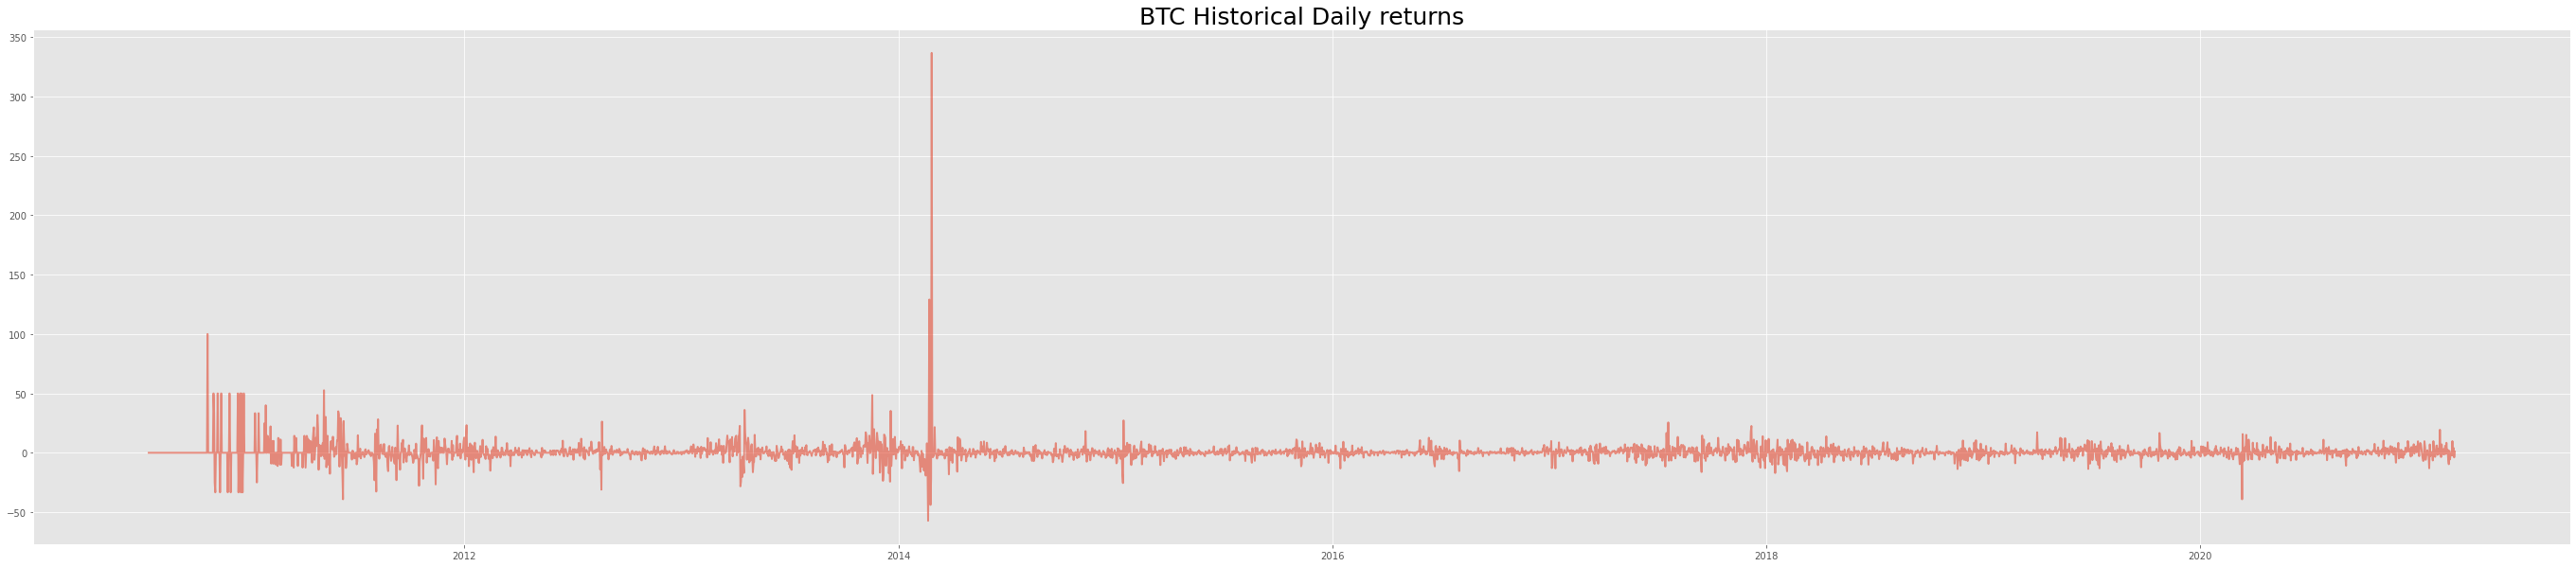

In [27]:
f, ax = plt.subplots(figsize=(48,10))

ax.plot(btc['Pct_Change'], lw = 2, alpha =.6)
ax.set_title('BTC Historical Daily returns', fontsize=25)

In [30]:
btc_monday = btc[btc['DAY'] == 'Monday']

In [32]:
btc_tuesday = btc[btc['DAY'] == 'Tuesday']

In [38]:
btc_wednesday = btc[btc['DAY'] == 'Wednesday']

In [34]:
btc_thursday = btc[btc['DAY'] == 'Thursday']

In [35]:
btc_friday = btc[btc['DAY'] == 'Friday']

In [36]:
btc_saturday = btc[btc['DAY'] == 'Saturday']

In [37]:
btc_sunday = btc[btc['DAY'] == 'Sunday']

Text(0.5, 1.0, 'BTC Historical Daily returns')

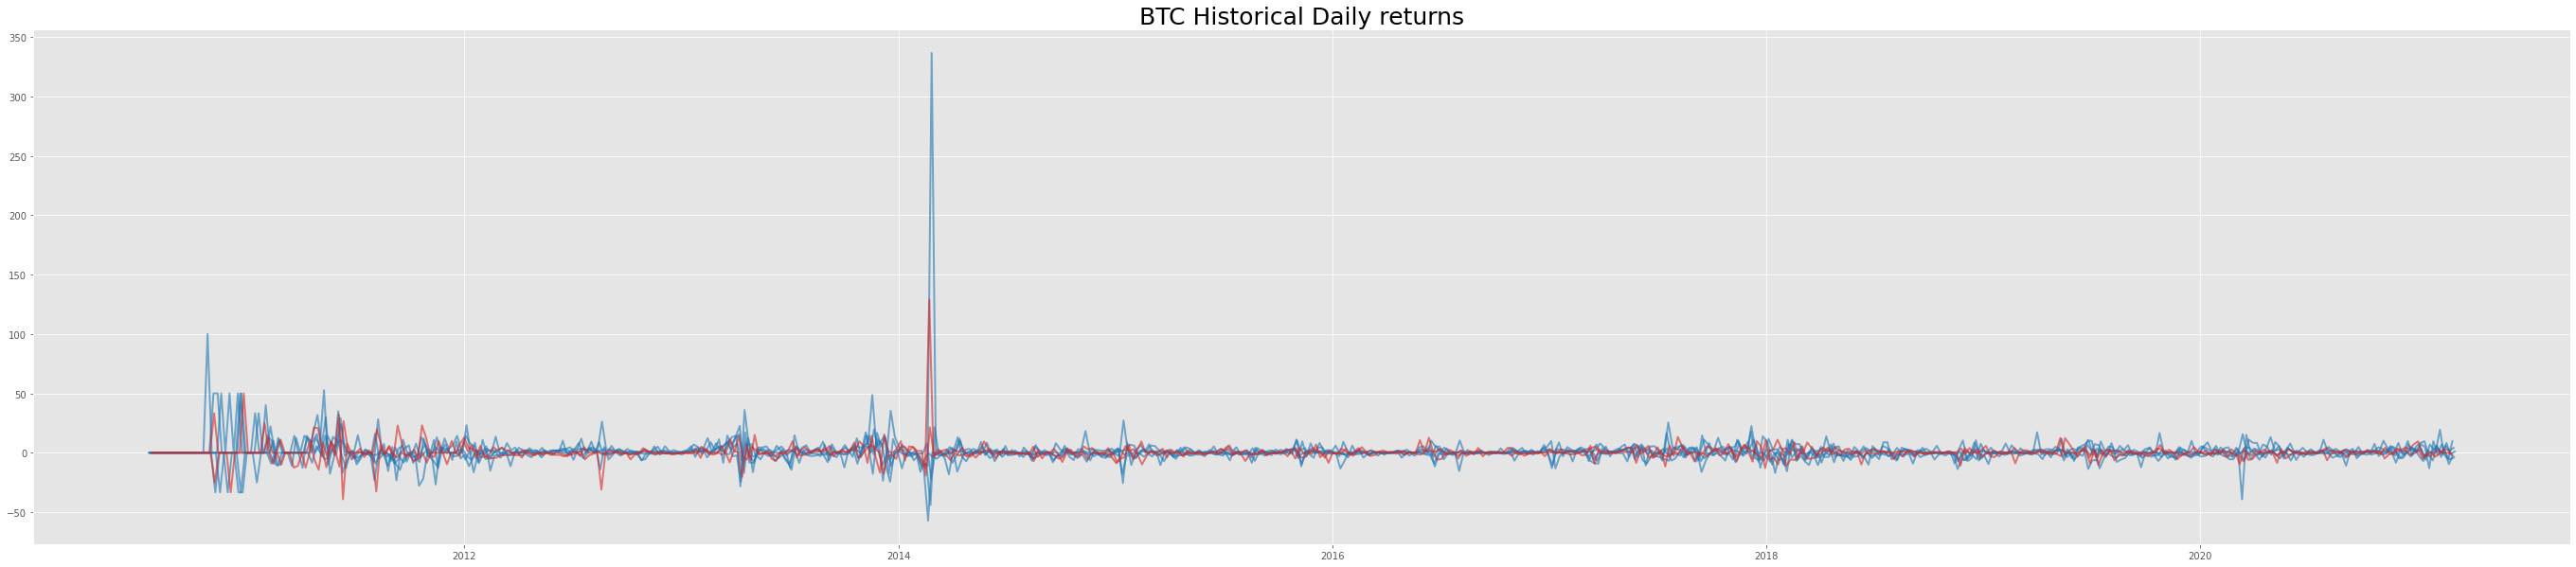

In [39]:
f, ax = plt.subplots(figsize=(48,10))

ax.plot(btc_monday['Pct_Change'], lw = 2, alpha =.6, color = 'tab:blue')
ax.plot(btc_tuesday['Pct_Change'], lw = 2, alpha =.6, color = 'tab:blue')
ax.plot(btc_wednesday['Pct_Change'], lw = 2, alpha =.6, color = 'tab:blue')
ax.plot(btc_thursday['Pct_Change'], lw = 2, alpha =.6, color = 'tab:blue')
ax.plot(btc_friday['Pct_Change'], lw = 2, alpha =.6, color = 'tab:blue')
ax.plot(btc_saturday['Pct_Change'], lw = 2, alpha =.6, color = 'tab:red')
ax.plot(btc_sunday['Pct_Change'], lw = 2, alpha =.6, color = 'tab:red')

ax.set_title('BTC Historical Daily returns', fontsize=25)

In [58]:
btc_monday_mean_returns = btc_monday['Pct_Change'].mean()
btc_tuesday_mean_returns = btc_tuesday['Pct_Change'].mean()
btc_wednesday_mean_returns = btc_wednesday['Pct_Change'].mean()
btc_thursday_mean_returns = btc_thursday['Pct_Change'].mean()
btc_friday_mean_returns = btc_friday['Pct_Change'].mean()
btc_saturday_mean_returns = btc_saturday['Pct_Change'].mean()
btc_sunday_mean_returns = btc_sunday['Pct_Change'].mean()
btc_mean_returns = btc['Pct_Change'].mean() # Average daily Returns 

In [59]:
print(f' The Bitcoin average daily return on Monday is {btc_monday_mean_returns}%')
print(f' The Bitcoin average daily return on Tuesday is {btc_tuesday_mean_returns}%')
print(f' The Bitcoin average daily return on Wednesday is {btc_wednesday_mean_returns}%')
print(f' The Bitcoin average daily return on Thursday is {btc_thursday_mean_returns}%')
print(f' The Bitcoin average daily return on Friday is {btc_friday_mean_returns}%')
print(f' The Bitcoin average daily return on Saturday is {btc_saturday_mean_returns}%')
print(f' The Bitcoin average daily return on Sunday is {btc_sunday_mean_returns}%')
print(f' The Bitcoin average daily return is {btc_mean_returns}%')

 The Bitcoin average daily return on Monday is 0.6364171575929819%
 The Bitcoin average daily return on Tuesday is 0.7516816846610322%
 The Bitcoin average daily return on Wednesday is 1.1086714183562605%
 The Bitcoin average daily return on Thursday is 0.504651606082355%
 The Bitcoin average daily return on Friday is 0.4485413860290602%
 The Bitcoin average daily return on Saturday is 0.42312589427304736%
 The Bitcoin average daily return on Sunday is 0.23818684366317622%
 The Bitcoin average daily return is 0.5874573427960854%


In [60]:
# create a df for plotting
data = {'Day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday','Sunday', 'Average'], 
        'Average Returns':[btc_monday_mean_returns,btc_tuesday_mean_returns,btc_wednesday_mean_returns,btc_thursday_mean_returns,btc_friday_mean_returns,btc_saturday_mean_returns,btc_sunday_mean_returns, btc_mean_returns]} 
  
# Create DataFrame 
daily_mean_returns = pd.DataFrame(data) 
  
# Print the output. 
daily_mean_returns 

,Day,Average Returns
0,Monday,0.636417
1,Tuesday,0.751682
2,Wednesday,1.108671
3,Thursday,0.504652
4,Friday,0.448541
5,Saturday,0.423126
6,Sunday,0.238187
7,Average,0.587457


In [61]:
daily_mean_returns = daily_mean_returns.set_index('Day')

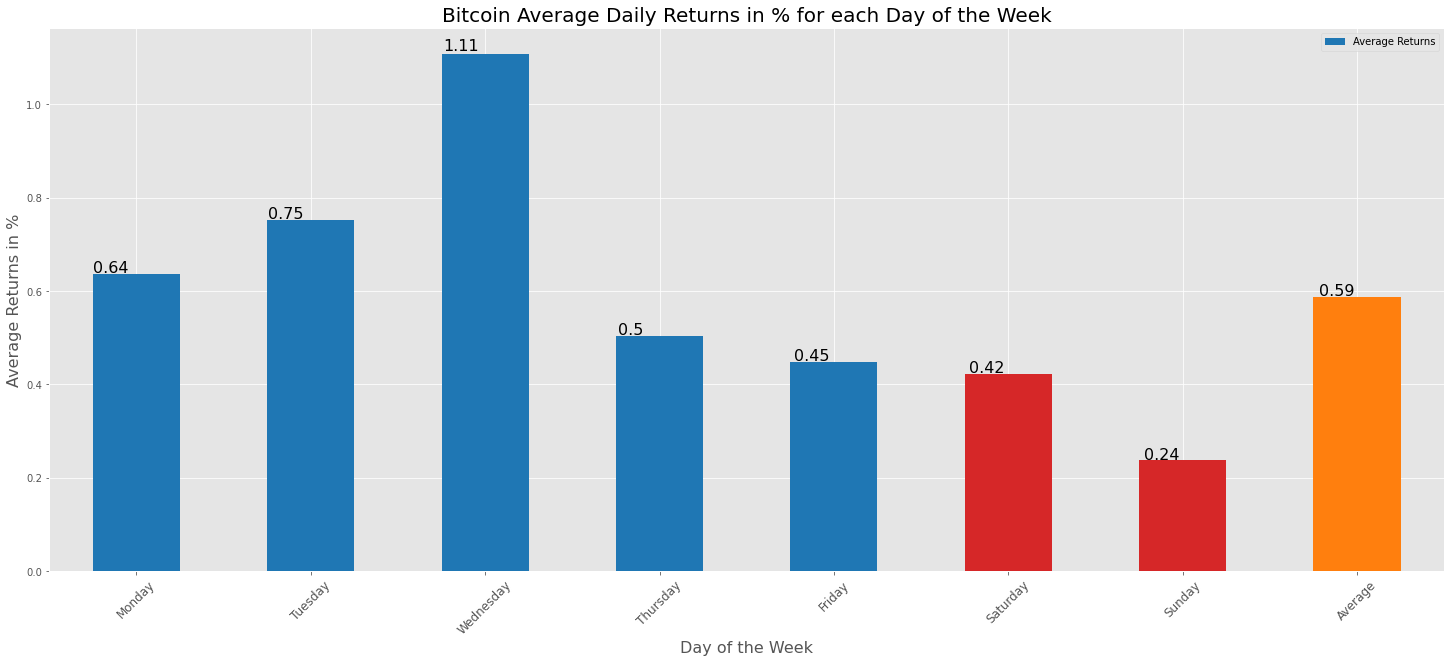

In [62]:
f,ax=plt.subplots(figsize=(25,10))

daily_mean_returns['Average Returns'].plot.bar(color=['tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:red', 'tab:red', 'tab:orange'])
ax.set_title('Bitcoin Average Daily Returns in % for each Day of the Week', fontsize = 20)
ax.set_xlabel('Day of the Week', fontsize = 16)
ax.set_ylabel('Average Returns in %', fontsize = 16)
ax.legend()
plt.xticks(rotation=45, fontsize = 12)

for p in ax.patches:
    ax.annotate(str(p.get_height().round(2)), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=16)

In [ ]:
# Day of the week Standard Deviations from the mean

In [65]:
btc_monday_std_mean_returns = btc_monday['Pct_Change'].std()
btc_tuesday_std_mean_returns = btc_tuesday['Pct_Change'].std()
btc_wednesday_std_mean_returns = btc_wednesday['Pct_Change'].std()
btc_thursday_std_mean_returns = btc_thursday['Pct_Change'].std()
btc_friday_std_mean_returns = btc_friday['Pct_Change'].std()
btc_saturday_std_mean_returns = btc_saturday['Pct_Change'].std()
btc_sunday_std_mean_returns = btc_sunday['Pct_Change'].std()
btc_std_mean_returns = btc['Pct_Change'].std() # Average daily Returns 

In [66]:
print(f' The Bitcoin Standard Devation of daily returns on Monday is {btc_monday_std_mean_returns}%')
print(f' The Bitcoin Standard Devation of daily returns on Tuesday is {btc_tuesday_std_mean_returns}%')
print(f' The Bitcoin Standard Devation of daily returns on Wednesday is {btc_wednesday_std_mean_returns}%')
print(f' The Bitcoin Standard Devation of daily returns on Thursday is {btc_thursday_std_mean_returns}%')
print(f' The Bitcoin Standard Devation of daily returns on Friday is {btc_friday_std_mean_returns}%')
print(f' The Bitcoin Standard Devation of daily returns on Saturday is {btc_saturday_std_mean_returns}%')
print(f' The Bitcoin Standard Devation of daily returns on Sunday is {btc_sunday_std_mean_returns}%')
print(f' The Bitcoin Standard Devation of daily returns is {btc_std_mean_returns}%')

 The Bitcoin Standard Devation of daily returns on Monday is 6.4253768390670025%
 The Bitcoin Standard Devation of daily returns on Tuesday is 7.306840826157014%
 The Bitcoin Standard Devation of daily returns on Wednesday is 15.33443550508923%
 The Bitcoin Standard Devation of daily returns on Thursday is 7.327068805156383%
 The Bitcoin Standard Devation of daily returns on Friday is 6.341109391661536%
 The Bitcoin Standard Devation of daily returns on Saturday is 7.506281023108394%
 The Bitcoin Standard Devation of daily returns on Sunday is 5.14033533087868%
 The Bitcoin Standard Devation of daily returns is 8.504522876259193%


In [68]:
# create a df for plotting
data = {'Day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday','Sunday', 'Average'], 
        'Average Returns':[btc_monday_std_mean_returns,btc_tuesday_std_mean_returns,btc_wednesday_std_mean_returns,btc_thursday_std_mean_returns,btc_friday_std_mean_returns,btc_saturday_std_mean_returns,btc_sunday_std_mean_returns, btc_std_mean_returns]} 
  
# Create DataFrame 
daily_std_mean_returns = pd.DataFrame(data) 
  
# Print the output. 
daily_std_mean_returns 

,Day,Average Returns
0,Monday,6.425377
1,Tuesday,7.306841
2,Wednesday,15.334436
3,Thursday,7.327069
4,Friday,6.341109
5,Saturday,7.506281
6,Sunday,5.140335
7,Average,8.504523


In [70]:
daily_std_mean_returns = daily_std_mean_returns.set_index('Day')

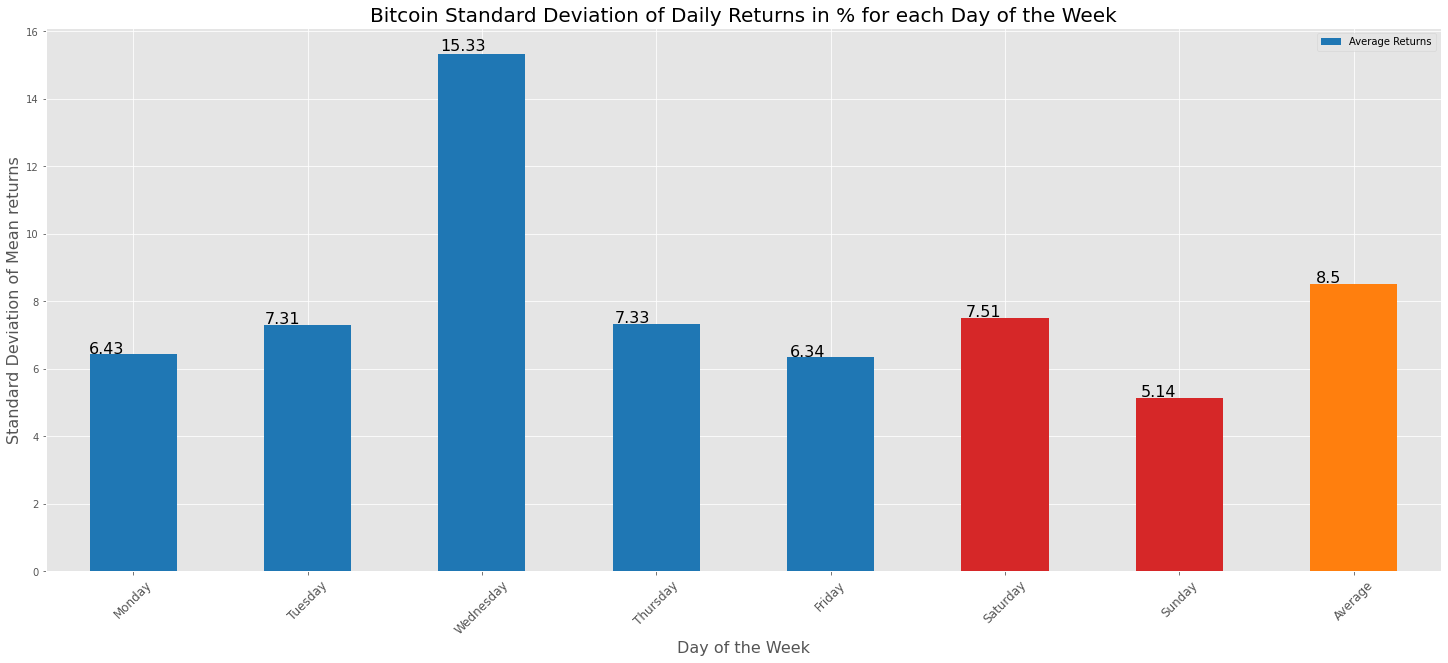

In [71]:
f,ax=plt.subplots(figsize=(25,10))

daily_std_mean_returns['Average Returns'].plot.bar(color=['tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:red', 'tab:red', 'tab:orange'])
ax.set_title('Bitcoin Standard Deviation of Daily Returns in % for each Day of the Week', fontsize = 20)
ax.set_xlabel('Day of the Week', fontsize = 16)
ax.set_ylabel('Standard Deviation of Mean returns', fontsize = 16)
ax.legend()
plt.xticks(rotation=45, fontsize = 12)

for p in ax.patches:
    ax.annotate(str(p.get_height().round(2)), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=16)

In [118]:
btc_monday['Volume'].sum()

161091774

In [119]:
btc_monday_volume_sum= btc_monday['Volume'].sum()
btc_tuesday_volume_sum = btc_tuesday['Volume'].sum()
btc_wednesday_volume_sum = btc_wednesday['Volume'].sum()
btc_thursday_volume_sum = btc_thursday['Volume'].sum()
btc_friday_volume_sum = btc_friday['Volume'].sum()
btc_saturday_volume_sum = btc_saturday['Volume'].sum()
btc_sunday_volume_sum = btc_sunday['Volume'].sum()

In [120]:
btc_volume_mean = (btc_sunday_volume_sum + btc_saturday_volume_sum + btc_friday_volume_sum + btc_thursday_volume_sum +
                   btc_wednesday_volume_sum + btc_tuesday_volume_sum + btc_monday_volume_sum) / 7

In [121]:
print(f' The Bitcoin total Volume on Monday is {btc_monday_volume_sum}')
print(f' The Bitcoin total Volume on Tuesday is {btc_tuesday_volume_sum}')
print(f' The Bitcoin total Volume on Wednesday is {btc_wednesday_volume_sum}')
print(f' The Bitcoin total Volume on Thursday is {btc_thursday_volume_sum}')
print(f' The Bitcoin total Volume on Friday is {btc_friday_volume_sum}')
print(f' The Bitcoin total Volume on Saturday is {btc_saturday_volume_sum}')
print(f' The Bitcoin total Volume on Sunday is {btc_sunday_volume_sum}')
print(f' The Bitcoin Average Volume across all week days is {btc_volume_mean}')

 The Bitcoin total Volume on Monday is 161091774
 The Bitcoin total Volume on Tuesday is 164744312
 The Bitcoin total Volume on Wednesday is 203505421
 The Bitcoin total Volume on Thursday is 170536061
 The Bitcoin total Volume on Friday is 173485531
 The Bitcoin total Volume on Saturday is 151424304
 The Bitcoin total Volume on Sunday is 143520087
 The Bitcoin Average Volume across all week days is 166901070.0


In [122]:
# create a df for plotting
data = {'Day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday','Sunday', 'Average'], 
        'Total Volume':[btc_monday_volume_sum,btc_tuesday_volume_sum,btc_wednesday_volume_sum,
                           btc_thursday_volume_sum,btc_friday_volume_sum,btc_saturday_volume_sum,
                           btc_sunday_volume_sum, btc_volume_mean]} 
  
# Create DataFrame 
daily_sum_volume = pd.DataFrame(data) 
  
# Print the output. 
daily_sum_volume 

,Day,Total Volume
0,Monday,161091774.0
1,Tuesday,164744312.0
2,Wednesday,203505421.0
3,Thursday,170536061.0
4,Friday,173485531.0
5,Saturday,151424304.0
6,Sunday,143520087.0
7,Average,166901070.0


In [124]:
daily_sum_volume = daily_sum_volume.set_index('Day')

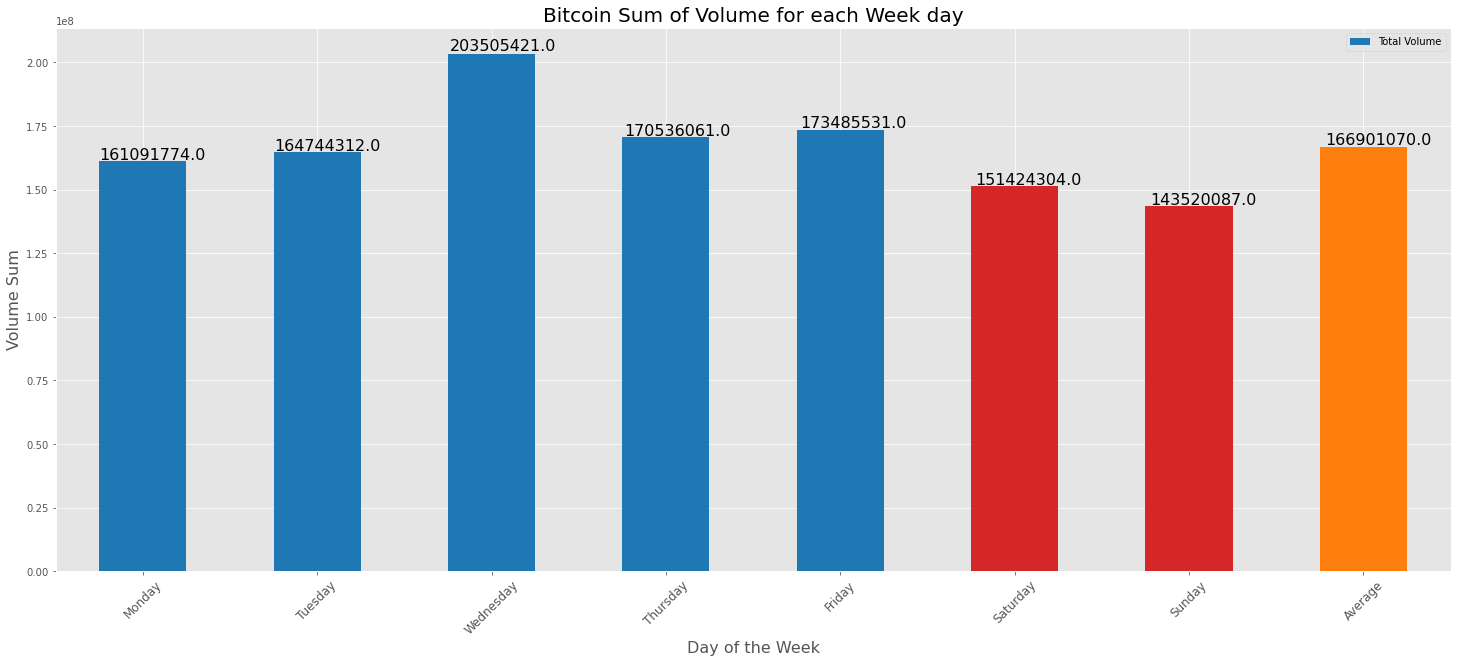

In [125]:
f,ax=plt.subplots(figsize=(25,10))

daily_sum_volume['Total Volume'].plot.bar(color=['tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:red', 'tab:red', 'tab:orange'])
ax.set_title('Bitcoin Sum of Volume for each Week day', fontsize = 20)
ax.set_xlabel('Day of the Week', fontsize = 16)
ax.set_ylabel('Volume Sum', fontsize = 16)
ax.legend()
plt.xticks(rotation=45, fontsize = 12)

for p in ax.patches:
    ax.annotate(str(p.get_height().round(2)), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=16)

In [146]:
btc_weekend_average_vol = (btc_saturday['Volume'].sum() + btc_sunday['Volume'].sum()) + 2 

In [147]:
btc_weekday_average_vol = (btc_monday['Volume'].sum() + btc_tuesday['Volume'].sum() + 
 btc_wednesday['Volume'].sum() + btc_thursday['Volume'].sum() +
 btc_friday['Volume'].sum() + btc_saturday['Volume'].sum() + btc_sunday['Volume'].sum())/ 7

In [148]:
# create a df for plotting
data = {'Day': ['Weekday', 'Weekend'], 
        'Total Volume':[btc_weekday_average_vol, btc_weekend_average_vol]} 
  
# Create DataFrame 
weekday_weekend = pd.DataFrame(data) 
  
# Print the output. 
weekday_weekend

,Day,Total Volume
0,Weekday,166901070.0
1,Weekend,147472195.5


In [149]:
weekday_weekend = weekday_weekend.set_index('Day')

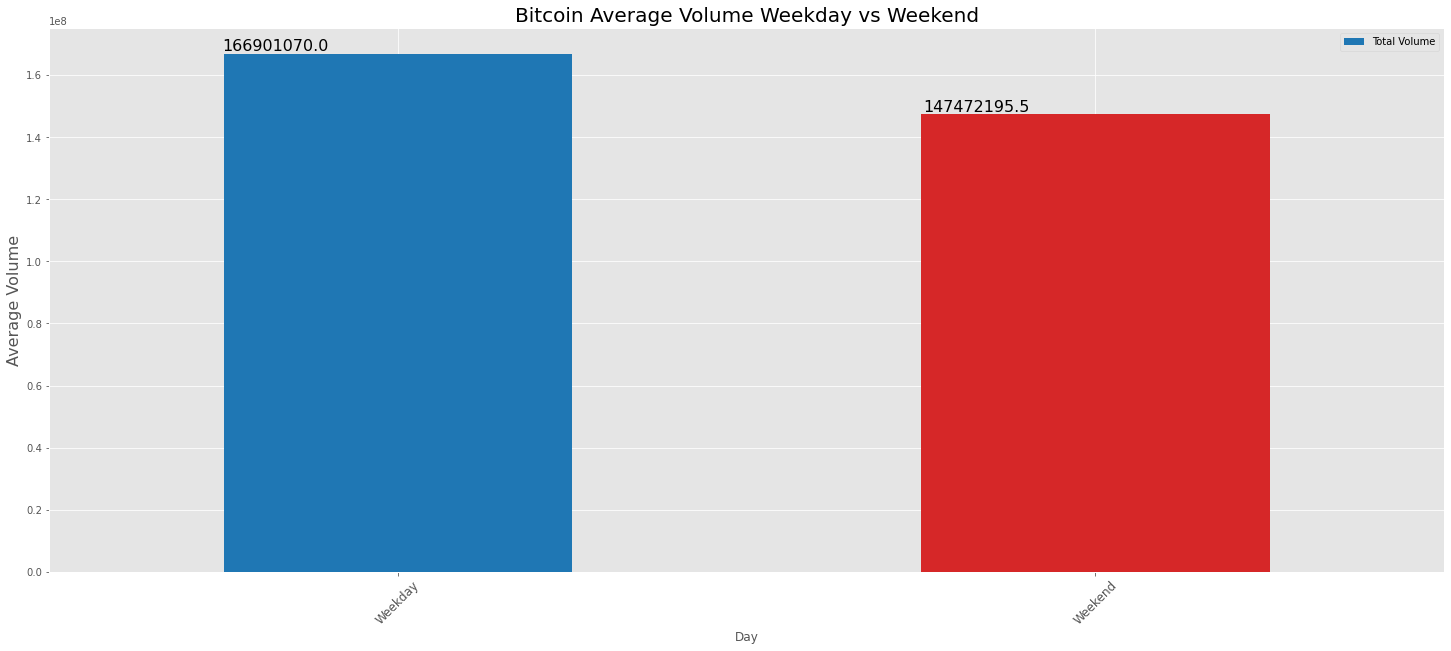

In [151]:
f,ax=plt.subplots(figsize=(25,10))

weekday_weekend['Total Volume'].plot.bar(color=['tab:blue', 'tab:red'])
ax.set_title('Bitcoin Average Volume Weekday vs Weekend', fontsize = 20)
ax.set_ylabel('Average Volume', fontsize = 16)
ax.legend()
plt.xticks(rotation=45, fontsize = 12)

for p in ax.patches:
    ax.annotate(str(p.get_height().round(2)), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=16)

In [207]:
#print((btc_monday['Pct_Change'] >= 0).value_counts())
print(f' The percentage of Up days on Monday is {334 / (221+334)}')
#print((btc_tuesday['Pct_Change'] >= 0).value_counts())
print(f' The percentage of Up days on Tuesday is {330 / (330+225)}')
#print((btc_wednesday['Pct_Change'] >= 0).value_counts())
print(f' The percentage of Up days on Wednesday is {332 / (223+332)}')
#print((btc_thursday['Pct_Change'] >= 0).value_counts())
print(f' The percentage of Up days on Thursday is {314 / (241+314)}')
#print((btc_friday['Pct_Change'] >= 0).value_counts())
print(f' The percentage of Up days on Friday is {335 / (335+220)}')
#print((btc_saturday['Pct_Change'] >= 0).value_counts())
print(f' The percentage of Up days on Saturdays is {328/(328+226)}')
#print((btc_sunday['Pct_Change'] >= 0).value_counts())
print(f' The percentage of Up days on Sunday is {312 / (312+243)}')
#print((btc['Pct_Change'] >= 0).value_counts())
print(f' The percentage of total Up days {2285 / (2285+1599)}')

 The percentage of Up days on Monday is 0.6018018018018018
 The percentage of Up days on Tuesday is 0.5945945945945946
 The percentage of Up days on Wednesday is 0.5981981981981982
 The percentage of Up days on Thursday is 0.5657657657657658
 The percentage of Up days on Friday is 0.6036036036036037
 The percentage of Up days on Saturdays is 0.592057761732852
 The percentage of Up days on Sunday is 0.5621621621621622
 The percentage of total Up days 0.5883110195674562


In [234]:
btc_monday = btc_monday.rename(columns = {'Pct_Change':'Pct_Change_Mon'})

In [235]:
btc_tuesday = btc_tuesday.rename(columns = {'Pct_Change':'Pct_Change_Tue'})
btc_wednesday = btc_wednesday.rename(columns = {'Pct_Change':'Pct_Change_Wed'})
btc_thursday = btc_thursday.rename(columns = {'Pct_Change':'Pct_Change_Thu'})
btc_friday = btc_friday.rename(columns = {'Pct_Change':'Pct_Change_Fri'})
btc_saturday = btc_saturday.rename(columns = {'Pct_Change':'Pct_Change_Sat'})
btc_sunday = btc_sunday.rename(columns = {'Pct_Change':'Pct_Change_Sun'})

In [236]:
df_combined = pd.concat([btc_monday[['Pct_Change_Mon', 'DAY']].reset_index(drop=True),btc_tuesday[['Pct_Change_Tue', 'DAY']].reset_index(drop=True)], axis=1)

In [238]:
df_combined = pd.concat([df_combined.reset_index(drop=True),btc_wednesday[['Pct_Change_Wed', 'DAY']].reset_index(drop=True)], axis=1)

In [239]:
df_combined = pd.concat([df_combined.reset_index(drop=True),btc_thursday[['Pct_Change_Thu', 'DAY']].reset_index(drop=True)], axis=1)

In [240]:
df_combined = pd.concat([df_combined.reset_index(drop=True),btc_friday[['Pct_Change_Fri', 'DAY']].reset_index(drop=True)], axis=1)

In [241]:
df_combined = pd.concat([df_combined.reset_index(drop=True),btc_saturday[['Pct_Change_Sat', 'DAY']].reset_index(drop=True)], axis=1)

In [242]:
df_combined = pd.concat([df_combined.reset_index(drop=True),btc_sunday[['Pct_Change_Sun', 'DAY']].reset_index(drop=True)], axis=1)

In [245]:
df_combined = df_combined.drop(columns = {'DAY'})

In [247]:
# create a list of the conditions
conditions = [
    ((df_combined['Pct_Change_Sat'] < 0) & (df_combined['Pct_Change_Sun'] < 0) & (df_combined['Pct_Change_Mon'] > 0)),
    ((df_combined['Pct_Change_Sat'] > 0) & (df_combined['Pct_Change_Sun'] > 0) & (df_combined['Pct_Change_Mon'] < 0)),
    ]

# create a list of the values we want to assign for each condition
values = ['Down_Weekend_Up_Monday', 'Up_Weekend_Down_Monday']

# create a new column and use np.select to assign values to it using our lists as arguments
df_combined['Weekend_Trading_Monday_Up/Down'] = np.select(conditions, values)

# display updated DataFrame
df_combined['Weekend_Trading_Monday_Up/Down'].head()

0    0
1    0
2    0
3    0
4    0
Name: Weekend_Trading_Monday_Up/Down, dtype: object

In [249]:
df_combined['Weekend_Trading_Monday_Up/Down'].value_counts()

0                         422
Up_Weekend_Down_Monday     69
Down_Weekend_Up_Monday     64
Name: Weekend_Trading_Monday_Up/Down, dtype: int64

In [254]:
df_combined[['Pct_Change_Sat', 'Pct_Change_Sun', 'Pct_Change_Mon', 'Weekend_Trading_Monday_Up/Down']]

,Pct_Change_Sat,Pct_Change_Sun,Pct_Change_Mon,Weekend_Trading_Monday_Up/Down
0,0.000000,NaN,0.000000,0
1,0.000000,0.000000,0.000000,0
2,0.000000,0.000000,0.000000,0
3,0.000000,0.000000,0.000000,0
4,0.000000,0.000000,0.000000,0
...,...,...,...,...
550,2.504073,-3.427345,1.231119,0
551,-0.428526,-1.028362,19.413737,Down_Weekend_Up_Monday
552,0.030587,3.126438,-1.453640,Up_Weekend_Down_Monday
553,-0.450744,2.700286,-5.784051,0


In [258]:
df_combined2 = df_combined[['Pct_Change_Sat', 'Pct_Change_Sun', 'Pct_Change_Mon', 'Weekend_Trading_Monday_Up/Down']]

In [259]:
df_combined2[df_combined2['Weekend_Trading_Monday_Up/Down'] == 'Down_Weekend_Up_Monday']

,Pct_Change_Sat,Pct_Change_Sun,Pct_Change_Mon,Weekend_Trading_Monday_Up/Down
46,-39.166667,-11.640212,10.778443,Down_Weekend_Up_Monday
80,-1.666667,-3.571429,1.851852,Down_Weekend_Up_Monday
89,-4.081633,-2.040816,4.166667,Down_Weekend_Up_Monday
99,-1.538462,-1.785714,1.818182,Down_Weekend_Up_Monday
100,-3.030303,-3.125000,1.612903,Down_Weekend_Up_Monday
...,...,...,...,...
518,-1.656114,-0.666752,4.166129,Down_Weekend_Up_Monday
520,-0.557883,-0.584603,2.841097,Down_Weekend_Up_Monday
527,-0.514426,-0.168935,0.961208,Down_Weekend_Up_Monday
548,-2.762382,-0.499452,2.158506,Down_Weekend_Up_Monday


In [260]:
df_combined2[df_combined2['Weekend_Trading_Monday_Up/Down'] == 'Up_Weekend_Down_Monday']

,Pct_Change_Sat,Pct_Change_Sun,Pct_Change_Mon,Weekend_Trading_Monday_Up/Down
55,6.315789,19.696970,-1.265823,Up_Weekend_Down_Monday
75,9.302326,7.692308,-4.761905,Up_Weekend_Down_Monday
76,1.492537,12.765957,-1.886792,Up_Weekend_Down_Monday
77,6.250000,4.411765,-11.267606,Up_Weekend_Down_Monday
119,0.952381,3.883495,-0.934579,Up_Weekend_Down_Monday
...,...,...,...,...
508,2.771540,0.725123,-1.102984,Up_Weekend_Down_Monday
521,0.157277,0.731050,-0.615001,Up_Weekend_Down_Monday
522,1.651932,0.412205,-0.495222,Up_Weekend_Down_Monday
542,4.357065,1.219022,-1.079469,Up_Weekend_Down_Monday


Text(0.5, 1.0, 'Down_Weekend_Up_Monday Bitcoin')

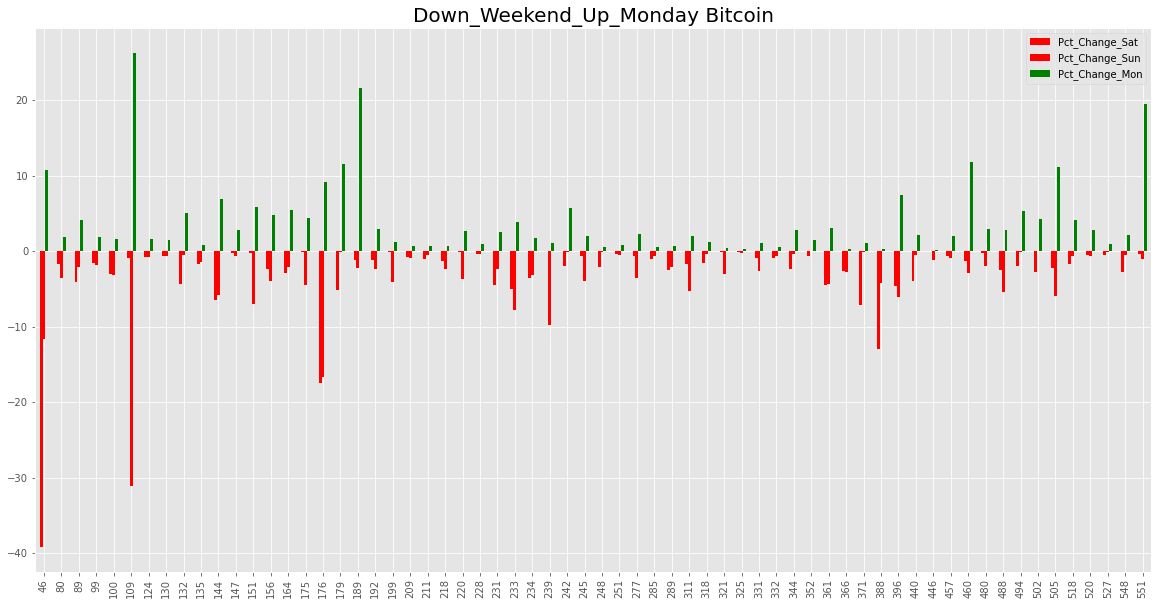

In [266]:
df_combined2[df_combined2['Weekend_Trading_Monday_Up/Down'] == 'Down_Weekend_Up_Monday'].plot(kind='bar', figsize=(20,10), color = ['red', 'red', 'green'])
plt.title('Down_Weekend_Up_Monday Bitcoin', fontsize=20)

Text(0.5, 1.0, 'Up_Weekend_Down_Monday')

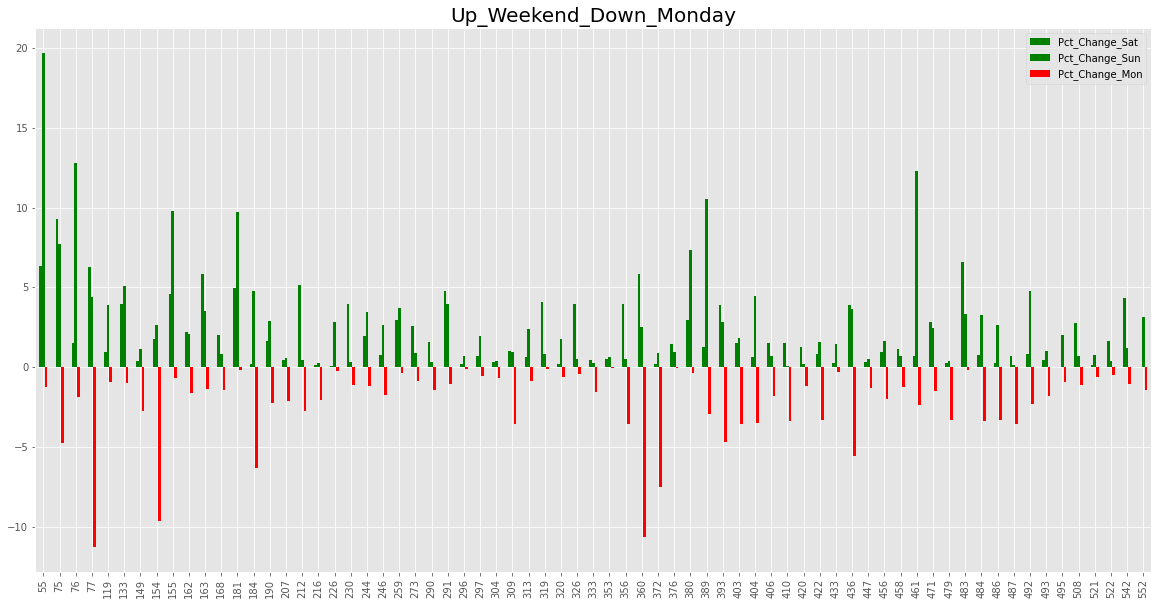

In [267]:
df_combined2[df_combined2['Weekend_Trading_Monday_Up/Down'] == 'Up_Weekend_Down_Monday'].plot(kind='bar', figsize=(20,10), color = ['green', 'green', 'red'])
plt.title('Up_Weekend_Down_Monday', fontsize=20)